<h1>Attributes</h1>
<p>
    <b>People</b>
<hr>
<b>ID:</b> Customer's unique identifier<br>
<b>Year_Birth:</b> Customer's birth year<br>
<b>Education:</b> Customer's education level<br>
<b>Marital_Status:</b> Customer's marital status<br>
<b>Income:</b> Customer's yearly household income<br>
<b>Kidhome:</b> Number of children in customer's household<br>
<b>Teenhome:</b> Number of teenagers in customer's household<br>
<b>Dt_Customer:</b> Date of customer's enrollment with the company<br>
<b>Recency:</b> Number of days since customer's last purchase<br>
<b>Complain:</b> 1 if the customer complained in the last 2 years, 0 otherwise
<br><br>
    <b>Products</b>
<hr>
<b>MntWines:</b> Amount spent on wine in last 2 years<br>
<b>MntFruits:</b> Amount spent on fruits in last 2 years<br>
<b>MntMeatProducts:</b> Amount spent on meat in last 2 years<br>
<b>MntFishProducts:</b> Amount spent on fish in last 2 years<br>
<b>MntSweetProducts:</b> Amount spent on sweets in last 2 years<br>
<b>MntGoldProds:</b> Amount spent on gold in last 2 years
<br><br>
    <b>Promotion</b>
<hr>
<b>NumDealsPurchases:</b> Number of purchases made with a discount<br>
<b>AcceptedCmp1:</b> 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
<b>AcceptedCmp2:</b> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
<b>AcceptedCmp3:</b> 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
<b>AcceptedCmp4:</b> 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
<b>AcceptedCmp5:</b> 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
<b>Response:</b> 1 if customer accepted the offer in the last campaign, 0 otherwise
<br><br>
    <b>Place</b>
<hr>
<b>NumWebPurchases:</b> Number of purchases made through the company’s website<br>
<b>NumCatalogPurchases:</b> Number of purchases made using a catalogue<br>
<b>NumStorePurchases:</b> Number of purchases made directly in stores<br>
<b>NumWebVisitsMonth:</b> Number of visits to company’s website in the last month<br>
</p>

In [1]:
import pandas as pd
import warnings 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Table of Contents

* [1. Pre-Processing](#1)
* [2. Visualization and Exploratory Analysis](#2)


# <p id = "1" style="font-family:arial;background-color:#2A93D5;color:#FFFFFF;font-size: 150%;text-align:center;border-radius: 0px 15px 15px 0px;border-style: solid;border-color: #2483bf;">1.PRE-PROCESSING</p>
[Click to return Table of Contents](#0)

In [2]:
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Checks the null distribution between columns:**

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Drops the rows with null values:**

In [5]:
data.drop(index=(data[data['Income'].isna()].index), axis = 0, inplace=True)

**Conversion of column type:**

In [6]:
from pandas.api.types import CategoricalDtype
education_ordered= CategoricalDtype(categories=['Basic','2n Cycle','Graduation', 'Master', 'PhD'], ordered=True)
data['Education'] = data['Education'].astype(education_ordered)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

**Calculating the year and day difference with Dt_Customer column.**

In [7]:
from datetime import datetime
currentYear = datetime.now().year

In [8]:
data['Year_Customer'] = data['Dt_Customer'].dt.year.apply(lambda x : currentYear - x)
data['DayDiff_Customer'] = data['Dt_Customer'].apply(lambda x : datetime.now() - x)
data['DayDiff_Customer'] = data['DayDiff_Customer'].dt.days
data.drop(['Dt_Customer'], axis = 1, inplace = True)

<hr>

# Age Variable

**Calculates the age of every customer and drops the Year_Birth column:**

In [9]:
data['Age'] = data['Year_Birth'].apply(lambda x : currentYear - x)
# Drops the Year_Birth column
data.drop(['Year_Birth'], axis = 1, inplace = True)
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,11,3947,66
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9,3101,69
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,10,3448,58
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,9,3041,39
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,9,3297,42


**The distribution of Age variable:**

<AxesSubplot:xlabel='Age', ylabel='Count'>

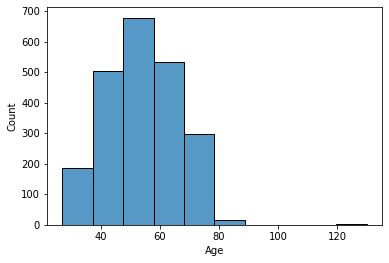

In [10]:
sns.histplot(data['Age'], bins=10)

**The age distribution rounds around 50. There are some outliers above 100.**

In [11]:
data['Age'].max()

130

In [12]:
data[data['Age'] > 100]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age
192,7829,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,10,3412,123
239,11004,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,9,3179,130
339,1150,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,10,3412,124


**Because of that the age group does not frequent, it could be removed from dataset to make the feature model work well.**

**The code below drops the customers which is over the age of 100:**

In [13]:
data.drop(index=(data[data['Age'] > 100].index), axis = 0, inplace=True)

**Setting ticks for X axis of age distribution histogram:**

In [14]:
minAgeTick = int(data['Age'].min() - (data['Age'].min() % 5))
minAgeTick

25

In [15]:
maxAgeTick = int(((data['Age'].max() // 5) + 1) * 5)
maxAgeTick

85

In [16]:
ticks = list(range(minAgeTick,maxAgeTick+1, 5))
ticks

[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

**Histogram of the Age Variable**

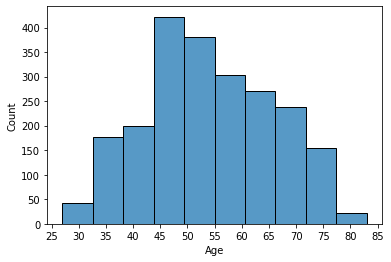

In [17]:
histogram_plot = sns.histplot(data['Age'],bins=10)
histogram_plot.set_xticks(ticks)

**The histogram is more clear for observation now.**
<hr>

# Age Groups

**Setting the age groups based on a function.**

In [18]:
def age_group(age):
    if age <= 25:
        age_group = 'Young Adult'
    elif (age > 25) & (age <= 64):
        age_group = 'Adult'
    else:
        age_group = 'Elder'
    return age_group

In [19]:
data['Age_Group'] = data['Age'].apply(lambda x: age_group(x))
age_group_ordered = CategoricalDtype(categories=['Young Adult','Adult', 'Elder'], ordered=True)
data['Age_Group'] = data['Age_Group'].astype(age_group_ordered)

<hr>

# Income Variable and Creation of Income Groups

<b>Setting the income groups based on a function.</b>

In [20]:
data['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Count'>

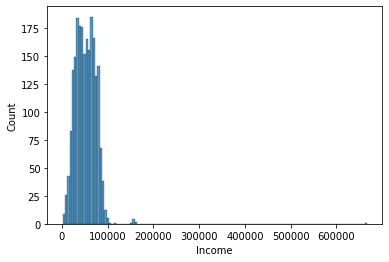

In [21]:
sns.histplot(data['Income'])

**Detecting outliers**

In [22]:
q1, q3 = np.percentile(data["Income"],[25,75])
interquartile_range = q3 - q1
higher_treshold = q3 + (interquartile_range * 1.5)
higher_treshold

118348.5

In [23]:
data[data['Income'] > higher_treshold]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age,Age_Group
164,8475,PhD,Married,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,9,3313,50,Adult
617,1503,PhD,Together,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,10,3616,47,Adult
655,5555,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,9,3133,48,Adult
687,1501,PhD,Married,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,11,3948,41,Adult
1300,5336,Master,Together,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,10,3585,52,Adult
1653,4931,Graduation,Together,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,10,3562,46,Adult
2132,11181,PhD,Married,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,10,3440,74,Elder
2233,9432,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,10,3644,46,Adult


In [24]:
data.drop(index=(data[data['Income'] > higher_treshold].index), axis = 0, inplace=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

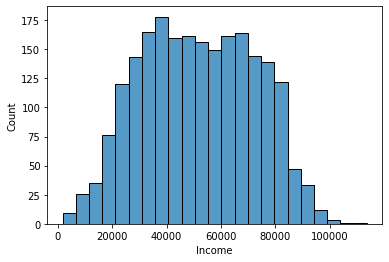

In [25]:
sns.histplot(data['Income'])

The distribution of data looks more normal distribution.

In [26]:
income_median = np.median(data['Income'])
income_std = np.std(data['Income'])

In [27]:
q1, q3 = np.percentile(data["Income"],[25,75])

In [28]:
def income_group(income):
    if income <= q1:
        income_group = 'Low'
    elif (income > q1) & (income <= q3):
        income_group = 'Middle'
    else:
        income_group = 'High'
    return income_group

In [29]:
data['Income_Group'] = data['Income'].apply(lambda x: income_group(x))
income_group_ordered = CategoricalDtype(categories=['Low','Middle', 'High'], ordered=True)
data['Income_Group'] = data['Income_Group'].astype(income_group_ordered)

In [30]:
data[data["Income_Group"] == "High"]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age,Age_Group,Income_Group
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,10,3448,58,Adult,High
15,2114,PhD,Single,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,11,3718,77,Elder,High
18,6565,Master,Married,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,10,3594,74,Elder,High
29,1966,PhD,Married,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,10,3355,58,Adult,High
34,8755,Master,Married,68657.0,0,0,4,482,34,471,119,68,22,1,3,5,9,7,0,0,0,0,0,0,3,11,0,10,3630,77,Elder,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10469,Graduation,Together,88325.0,0,0,42,519,71,860,93,27,53,1,6,2,9,2,0,0,0,0,0,0,3,11,0,9,3194,42,Adult,High
2213,3661,2n Cycle,Single,80617.0,0,0,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,3,11,0,11,3702,28,Adult,High
2217,9589,PhD,Widow,82032.0,0,0,54,332,194,377,149,125,57,0,4,6,7,1,0,0,0,0,0,0,3,11,0,9,3192,75,Elder,High
2221,7366,Master,Single,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,10,3584,41,Adult,High


# Marital Status Variable

In [31]:
data['Marital_Status'].value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**There are some categories which has very low value.
Drops the non-freqent categories:**

In [32]:
data.drop(index=(data[data['Marital_Status'] == 'Alone'].index), axis = 0, inplace = True)
data.drop(index=(data[data['Marital_Status'] == 'Absurd'].index), axis = 0, inplace = True)
data.drop(index=(data[data['Marital_Status'] == 'YOLO'].index), axis = 0, inplace = True)

# Kidhome Variable

In [33]:
kidhome_category = CategoricalDtype(categories=[0,1,2], ordered = False)
data['Kidhome'] = data['Kidhome'].astype(kidhome_category)

# Response Variable

In [34]:
data['Response'] = data['Response'].astype("category")
data['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2198, dtype: category
Categories (2, int64): [0, 1]

# <p id = "2" style="font-family:arial;background-color:#2A93D5;color:#FFFFFF;font-size: 150%;text-align:center;border-radius: 0px 15px 15px 0px;border-style: solid;border-color: #2483bf;">2.VISUALIZATION and EXPLORATORY ANALYSIS</p>
[Click to return Table of Contents](#0)

<p style="text-align:center; font-size:125%;"><b>The Age Distribution</b></p>

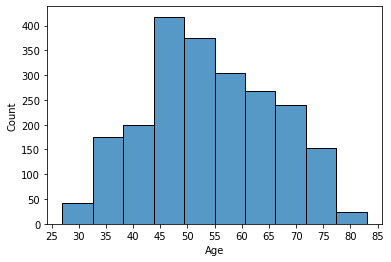

In [35]:
histogram_plot = sns.histplot(data['Age'],bins=10)
histogram_plot.set_xticks(ticks)

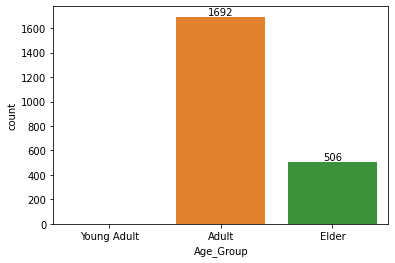

In [36]:
ax = sns.countplot(data=data, x="Age_Group")
for container in ax.containers:
    ax.bar_label(container)

Percents of each age group:

In [37]:
round((data['Age_Group'].value_counts(normalize=True) * 100),0)

Adult          77.0
Elder          23.0
Young Adult     0.0
Name: Age_Group, dtype: float64

There are no customers from the young adult group. It may be because of that the age variable's calculation is based on the current year.

<p style="text-align:center; font-size:125%;"><b>Kidhome and Teenhome Distribution</b></p>
<hr>

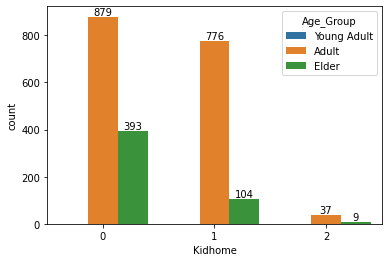

In [38]:
ax = sns.countplot(data=data, x="Kidhome", hue="Age_Group")
smt = [(data[data['Kidhome'] == 0].count()[0]), (data[data['Kidhome'] == 1].count()[0]), (data[data['Kidhome'] == 2].count()[0])]
for container in ax.containers:
    ax.bar_label(container)

([<matplotlib.patches.Wedge at 0x7fb5b4e99ed0>,
 [Text(-0.269231850666863, 1.0665431123899756, '0'),
  Text(0.19857809836969287, -1.0819273260473075, '1'),
  Text(1.0976233586695343, -0.07227006643840023, '2')],
 [Text(-0.1468537367273798, 0.5817507885763503, '57.9%'),
  Text(0.10831532638346883, -0.5901421778439858, '40.0%'),
  Text(0.5987036501833823, -0.0394200362391274, '2.1%')])

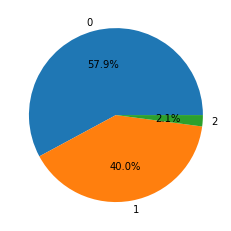

In [39]:
percentage_distribution = round((data['Kidhome'].value_counts(normalize=True) * 100),0)
plt.pie(data['Kidhome'].value_counts(), labels = ["0", "1", "2"], autopct='%1.1f%%')

The vast majority of customers do not have a kid in their home. The group with the most kids in the house is the adult group.

<hr><hr>

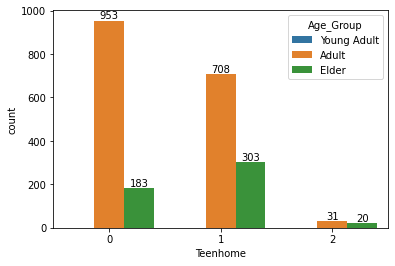

In [40]:
ax = sns.countplot(data=data, x="Teenhome", hue="Age_Group")
for container in ax.containers:
    ax.bar_label(container)

([<matplotlib.patches.Wedge at 0x7fb5b4da0450>,
 [Text(-0.058145233806401846, 1.0984621667520458, '0'),
  Text(-0.02200974166161712, -1.099779783080226, '1'),
  Text(1.097078834338265, -0.08011261602890049, '2')],
 [Text(-0.03171558207621918, 0.5991611818647521, '51.7%'),
  Text(-0.012005313633609337, -0.5998798816801232, '46.0%'),
  Text(0.5984066369117808, -0.04369779056121844, '2.3%')])

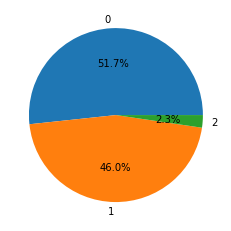

In [41]:
percentage_distribution = round((data['Teenhome'].value_counts(normalize=True) * 100),0)
plt.pie(data['Teenhome'].value_counts(), labels = ["0", "1", "2"], autopct='%1.1f%%')

Almost half of customers do not have a teen in their home. The group with the most teen in the house is the adult group. Visibly, members of the elder age group mostly live with a teen.
<hr>
<hr>

<p style="text-align:center; font-size:125%;"><b>Education</b></p>
<hr>

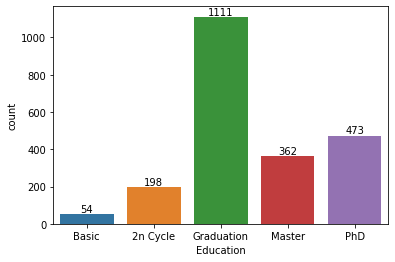

In [42]:
ax = sns.countplot(data=data, x="Education")
for container in ax.containers:
    ax.bar_label(container)

Percents of each education group:

([<matplotlib.patches.Wedge at 0x7fb5b4d052d0>,
 [Text(-0.018865709194141076, 1.099838208563697, 'Graduation'),
  Text(-0.8339399055689836, -0.7173173871443483, 'PhD'),
  Text(0.35959446981695925, -1.03956328199733, 'Master'),
  Text(0.9964580613638294, -0.46590914558853536, '2n Cycle'),
  Text(1.0967252270294794, -0.08481613288247136, 'Basic')],
 [Text(-0.01029038683316786, 0.5999117501256529, '50.5%'),
  Text(-0.4548763121285364, -0.3912640293514627, '21.5%'),
  Text(0.19614243808197776, -0.567034517453089, '16.5%'),
  Text(0.5435225789257251, -0.2541322612301102, '9.0%'),
  Text(0.5982137601978977, -0.04626334520862074, '2.5%')])

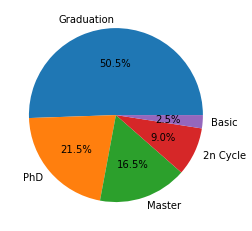

In [43]:
percentage_distribution = round((data['Education'].value_counts(normalize=True) * 100),0)
plt.pie(data['Education'].value_counts(), labels = (data['Education'].value_counts().index) ,autopct='%1.1f%%')

In [44]:
round((data['Education'].value_counts(normalize=True) * 100),0)

Graduation    51.0
PhD           22.0
Master        16.0
2n Cycle       9.0
Basic          2.0
Name: Education, dtype: float64

The half of clients are at the graduate level. It is observed that the customers who have received PhD level education are at a level that cannot be underestimated.

<p style="text-align:center; font-size:125%;"><b>Marital Status</b></p>

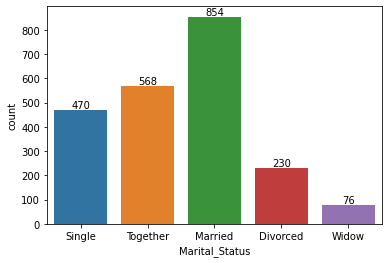

In [45]:
ax = sns.countplot(data=data, x="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)

Percents of each marital status group:

In [46]:
round((data['Marital_Status'].value_counts(normalize=True) * 100),0)

Married     39.0
Together    26.0
Single      21.0
Divorced    10.0
Widow        3.0
Name: Marital_Status, dtype: float64

([<matplotlib.patches.Wedge at 0x7fb5b4f9fa10>,
 [Text(0.37737105027210194, 1.0332429967904602, 'Married'),
  Text(-1.0931711756159788, -0.12237965845016482, 'Together'),
  Text(0.026725136204632176, -1.0996753007569298, 'Single'),
  Text(0.9400743439104327, -0.5711919361487605, 'Divorced'),
  Text(1.0935165264635396, -0.11925437665391914, 'Widow')],
 [Text(0.20583875469387375, 0.5635870891584327, '38.9%'),
  Text(-0.5962751866996248, -0.06675254097281717, '25.8%'),
  Text(0.014577347020708458, -0.5998228913219616, '21.4%'),
  Text(0.5127678239511451, -0.3115592378993239, '10.5%'),
  Text(0.5964635598892034, -0.06504784181122862, '3.5%')])

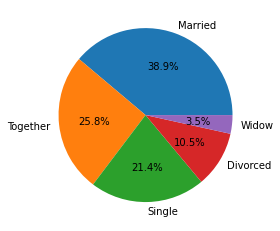

In [47]:
percentage_distribution = round((data['Marital_Status'].value_counts(normalize=True) * 100),0)
plt.pie(data['Marital_Status'].value_counts(), labels = (data['Marital_Status'].value_counts().index) ,autopct='%1.1f%%')

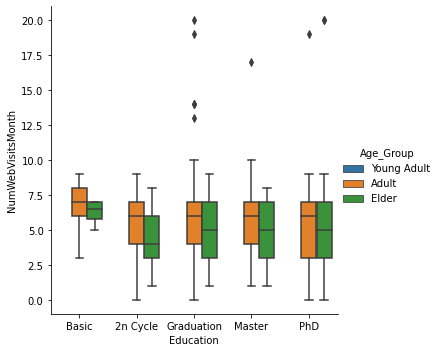

In [48]:
sns.catplot(data=data, x = "Education", y = "NumWebVisitsMonth", kind="box", hue="Age_Group")

In almost every age group, except for the level of Phd education, the elder group made fewer website visits than the adult group.

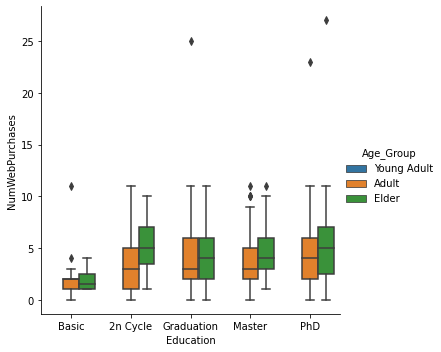

In [49]:
sns.catplot(data=data, x = "Education", y = "NumWebPurchases", kind="box", hue="Age_Group")

However, when the shopping rates are examined, it is observed that the **elder group generally makes more internet shopping**.

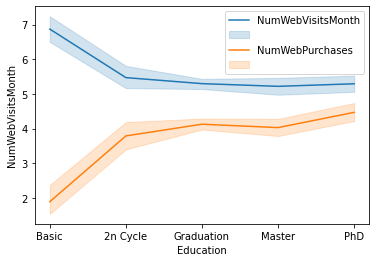

In [50]:
fig, ax = plt.subplots()
ax_1 = sns.lineplot(data=data, x="Education", y="NumWebVisitsMonth")
ax_2 = sns.lineplot(data=data, x="Education", y="NumWebPurchases")
plt.legend(["NumWebVisitsMonth","","NumWebPurchases",""])

In the case of education, it is observed that the number of purchases is approaching with the website visits made in the process from basic to phd level. Accordingly, it is estimated that as the level of education increases, **the customer plans in advance what he/she will buy**. **As the level of education decreases, the number of non-shopping visits increases**.

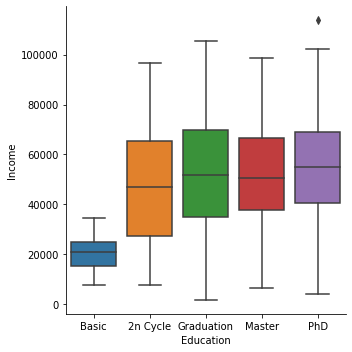

In [51]:
sns.catplot(data=data, x="Education", y="Income", kind="box")

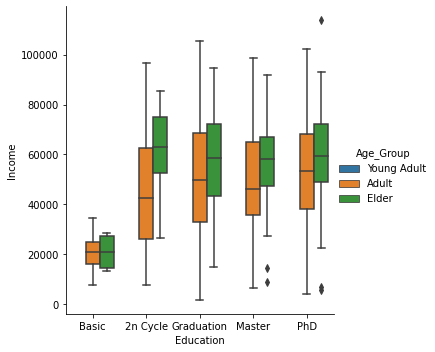

In [52]:
sns.catplot(data=data, x="Education", y="Income", kind="box", hue="Age_Group")

On an average basis, the income of the PhD group is higher than the other groups. It is observed that the income status of the Basic group is quite low compared to the other groups.

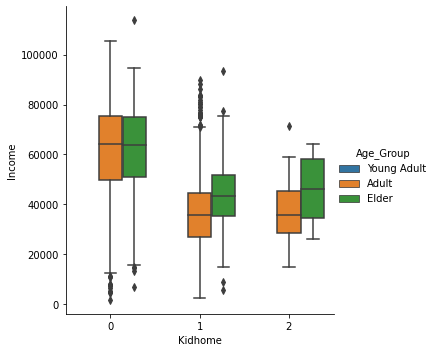

In [53]:
sns.catplot(data=data, x="Kidhome", y="Income", kind="box", hue="Age_Group")

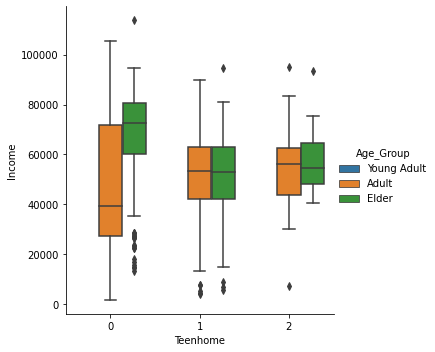

In [54]:
sns.catplot(data=data, x="Teenhome", y="Income", kind="box", hue="Age_Group")

In [55]:
correlation = data[['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response','Year_Customer']].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [56]:
correlation

,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Year_Customer
Income,1.000000,0.043315,0.005751,0.730488,0.537308,0.702962,0.551700,0.555804,0.416601,-0.132274,0.503996,0.709892,0.687222,-0.648688,0.344307,0.110337,-0.009827,0.233570,0.415731,-0.027487,NaN,NaN,-0.026643
Teenhome,0.043315,1.000000,0.015081,0.002574,-0.175405,-0.266533,-0.204112,-0.163670,-0.017061,0.394087,0.160016,-0.112388,0.047762,0.127261,-0.144613,-0.015782,-0.044880,0.038024,-0.189853,0.007680,NaN,NaN,0.009624
Recency,0.005751,0.015081,1.000000,0.015893,-0.006496,0.024914,-0.000503,0.024253,0.017742,0.003293,-0.003759,0.027927,-0.000054,-0.015885,-0.022356,-0.001652,-0.032374,0.017063,-0.000826,0.005556,NaN,NaN,0.030068
MntWines,0.730488,0.002574,0.015893,1.000000,0.385099,0.593812,0.397438,0.388620,0.391241,0.011871,0.552457,0.674181,0.639187,-0.330285,0.351736,0.206305,0.062323,0.373214,0.473449,-0.036759,NaN,NaN,0.153334
MntFruits,0.537308,-0.175405,-0.006496,0.385099,1.000000,0.568126,0.591294,0.571033,0.390309,-0.135086,0.302917,0.512070,0.459131,-0.422855,0.189470,-0.010159,0.015356,0.006095,0.206221,-0.003137,NaN,NaN,0.053836
MntMeatProducts,0.702962,-0.266533,0.024914,0.593812,0.568126,1.000000,0.596466,0.557186,0.376120,-0.165029,0.331455,0.715405,0.517434,-0.543350,0.326876,0.045800,0.022357,0.096694,0.390933,-0.021012,NaN,NaN,0.081105
MntFishProducts,0.551700,-0.204112,-0.000503,0.397438,0.591294,0.596466,1.000000,0.585017,0.420445,-0.144093,0.301464,0.561307,0.458258,-0.450959,0.257973,0.002277,0.000655,0.016008,0.190713,-0.019248,NaN,NaN,0.067086
MntSweetProducts,0.555804,-0.163670,0.024253,0.388620,0.571033,0.557186,0.585017,1.000000,0.356650,-0.120998,0.333726,0.524366,0.454103,-0.429376,0.243925,0.009789,0.001848,0.028365,0.257221,-0.020893,NaN,NaN,0.072718
MntGoldProds,0.416601,-0.017061,0.017742,0.391241,0.390309,0.376120,0.420445,0.356650,1.000000,0.058394,0.409105,0.468427,0.389523,-0.250001,0.165148,0.051248,0.127422,0.024391,0.171316,-0.030362,NaN,NaN,0.142909
NumDealsPurchases,-0.132274,0.394087,0.003293,0.011871,-0.135086,-0.165029,-0.144093,-0.120998,0.058394,1.000000,0.250645,-0.056678,0.073004,0.362293,-0.128349,-0.038331,-0.022098,0.017854,-0.186039,0.004352,NaN,NaN,0.188527


<AxesSubplot:>

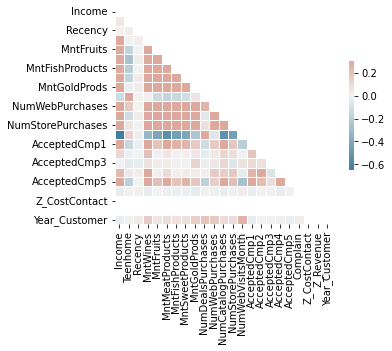

In [57]:
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
train, test = train_test_split(data, test_size = 0.3)

In [60]:
train_X = train[['Income','Kidhome','Teenhome']]
train_y = train.Response
test_X = test[['Income','Kidhome','Teenhome']]
test_y = test.Response

In [61]:
neighborList = []
accuracyList = []
aucList = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction,test_y)*100
    auc = roc_auc_score(prediction, test_y)
    neighborList.append(i)
    accuracyList.append(accuracy)
    aucList.append(auc)

<AxesSubplot:>

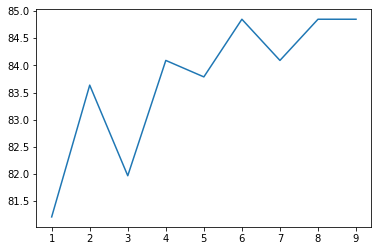

In [62]:
sns.lineplot(x=neighborList, y=accuracyList)

<AxesSubplot:>

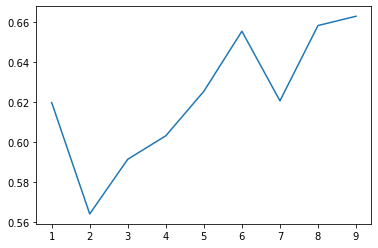

In [63]:
sns.lineplot(x=neighborList, y=aucList)